# End to End Time Series forecasting using ARIMA

In [ ]:
#Changing working directory
import os
print(os.getcwd())


/content


In [ ]:
#Data Import and cleaning

In [ ]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('HDFCBANK.csv')
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
5,2000-01-10,HDFCBANK,EQ,168.35,172.90,179.50,165.00,166.30,165.90,167.79,100434,1.685217e+12,NaN,NaN,NaN
6,2000-01-11,HDFCBANK,EQ,165.90,166.50,167.90,157.00,163.00,163.40,161.40,145784,2.352907e+12,NaN,NaN,NaN
7,2000-01-12,HDFCBANK,EQ,163.40,163.75,167.95,162.30,165.10,165.45,163.89,85952,1.408658e+12,NaN,NaN,NaN
8,2000-01-13,HDFCBANK,EQ,165.45,169.90,169.90,165.00,165.95,165.10,165.26,48276,7.977871e+11,NaN,NaN,NaN
9,2000-01-14,HDFCBANK,EQ,165.10,168.00,168.00,164.00,166.00,165.45,164.68,58152,9.576544e+11,NaN,NaN,NaN


In [ ]:
#Data Cleaning
HDFCBankStockData = TempData.dropna()


HDFCBankStockData.index = pd.to_datetime(HDFCBankStockData.Date)
  
HDFCBankStockData = HDFCBankStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count    230.000000
mean     653.382391
std       31.989898
min      561.900000
25%      633.762500
50%      656.575000
75%      675.950000
max      725.150000
Name: Prev Close, dtype: float64

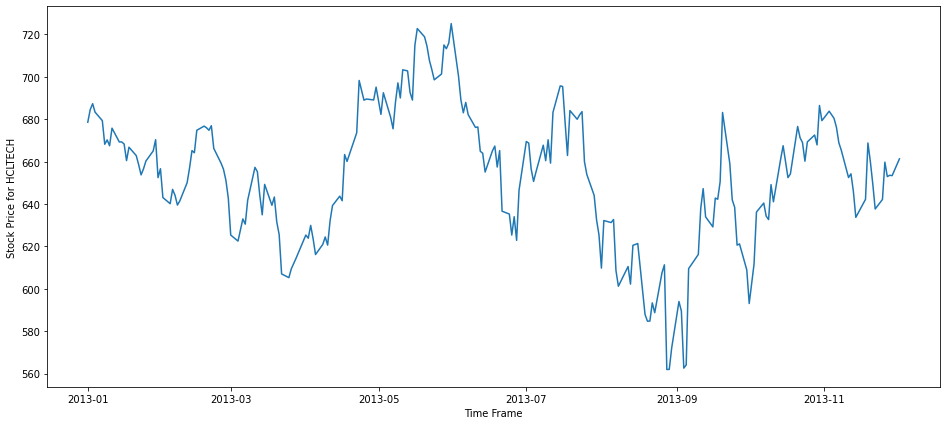

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HDFC Bank')
ax1.plot(HDFCBankStockData)

In [ ]:
# Checking stationarity

In [ ]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

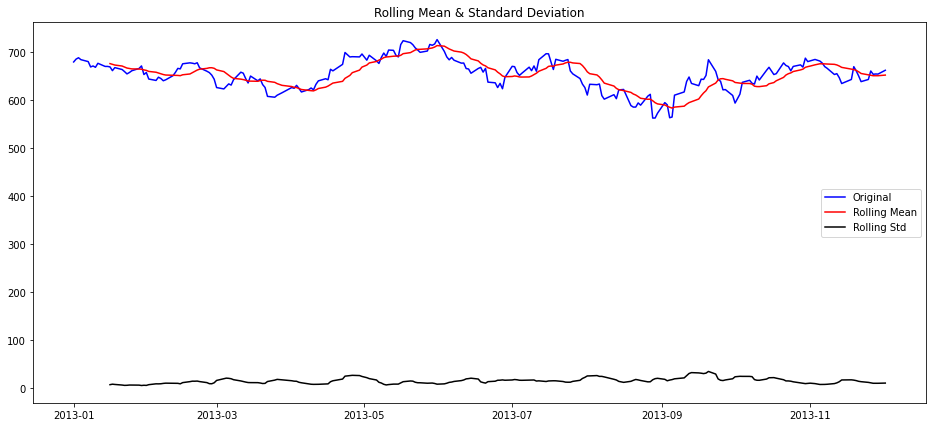

In [ ]:
#Determing rolling statistics
rolLmean = HDFCBankStockData.rolling(12).mean()
rolLstd = HDFCBankStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HDFCBankStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

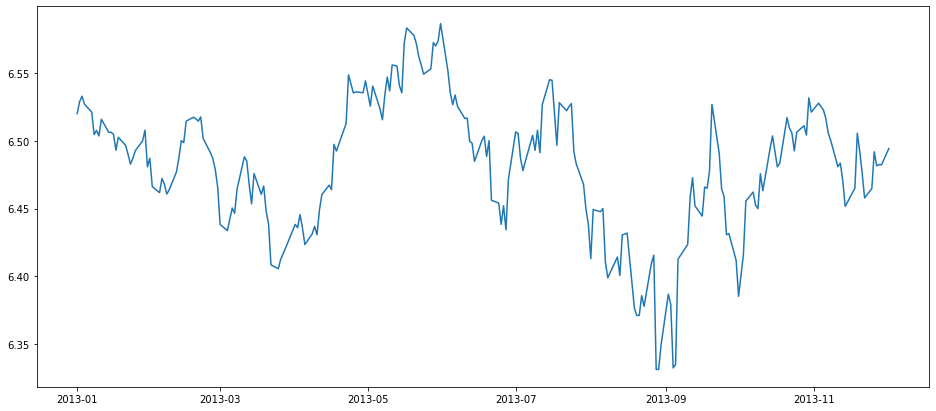

In [ ]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HDFCBankStockData)
plt.plot(ts_log)

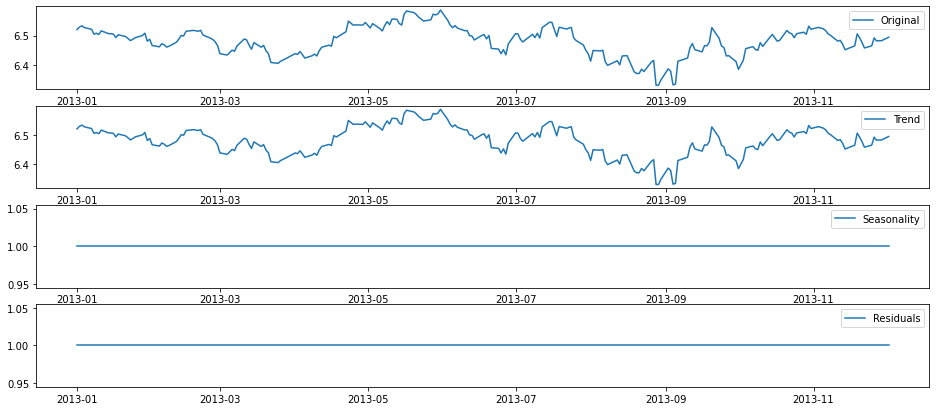

In [ ]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

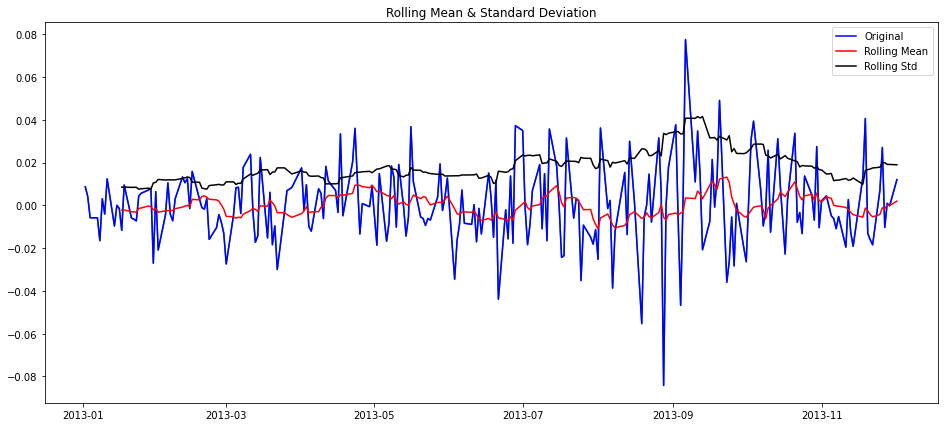

In [ ]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
HDFCBankStockData.sort_index(inplace= True)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

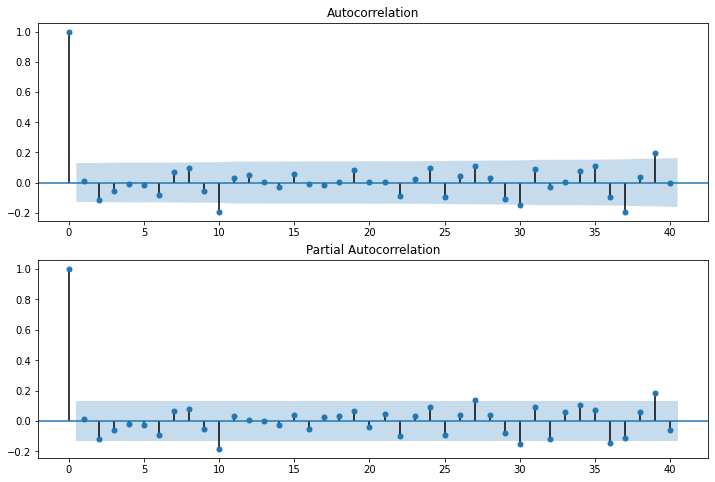

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
type(ts_log_diff)

pandas.core.series.Series

In [ ]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

LinAlgError: ignored

<Figure size 1152x576 with 0 Axes>

# Taking results back to original scale

In [ ]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

NameError: ignored

In [ ]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

In [ ]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HDFCBankStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HDFCBankStockData)**2)/len(HDFCBankStockData)))

In [ ]:
results_ARIMA.predict(10,20)

In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [ ]:
arimamodel(ts_log)